<a href="https://colab.research.google.com/github/tqsyed/fc2conv-tf/blob/main/TF_Keras_springboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the cell below if using Colab

In [ ]:
# %tensorflow_version 2.x

# What is KERAS

You have just found Keras.
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

    Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
    Supports both convolutional networks and recurrent networks, as well as combinations of the two.
    Runs seamlessly on CPU and GPU.
Read the documentation at  https://keras.io/

# Types of keras models
### Sequential  Models
The Sequential model is a linear stack of layers.
### Functional API
The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.
    

## Creating dummy dataset

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import tensorflow as tf
from  tensorflow.python import keras
import numpy as np

X, y = datasets.make_blobs(n_samples = 10000, n_features=100, centers=10)
y = tf.keras.utils.to_categorical(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Sequential Models on dummy dataset

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#from keras.models import Sequential
#from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
210/210 [==============================] - 5s 3ms/step - loss: 0.1026 - accuracy: 0.9881
Epoch 2/10
210/210 [==============================] - 1s 3ms/step - loss: 9.3429e-04 - accuracy: 1.0000
Epoch 3/10
210/210 [==============================] - 1s 3ms/step - loss: 5.4979e-04 - accuracy: 1.0000
Epoch 4/10
210/210 [==============================] - 1s 3ms/step - loss: 3.9190e-04 - accuracy: 1.0000
Epoch 5/10
210/210 [==============================] - 1s 6ms/step - loss: 3.0499e-04 - accuracy: 1.0000
Epoch 6/10
210/210 [==============================] - 1s 7ms/step - loss: 2.4982e-04 - accuracy: 1.0000
Epoch 7/10
210/210 [==============================] - 1s 5ms/step - loss: 2.1169e-04 - accuracy: 1.0000
Epoch 8/10
210/210 [==============================] - 1s 4ms/step - loss: 1.8368e-04 - accuracy: 1.0000
Epoch 9/10
210/210 [==============================] - 1s 3ms/step - loss: 1.6222e-04 - accuracy: 1.0000
Epoch 10/10
210/210 [==============================] - 1s 3ms/step -

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

26/26 [==============================] - 0s 2ms/step - loss: 1.3408e-04 - accuracy: 1.0000
Test loss: 0.00013408400991465896
Test accuracy: 1.0


In [ ]:
model.predict(X_test).round()

104/104 [==============================] - 0s 1ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
print(y_test[0])
print(np.argmax(y_test[0]))
prediction = model.predict(X_test[0:1])
print(prediction)
print(np.argmax(prediction))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
1/1 [==============================] - 0s 30ms/step
[[1.3872216e-04 1.2335268e-07 1.8237154e-06 1.6328966e-06 9.8086539e-06
  2.8697825e-10 1.0311542e-06 5.2409021e-05 4.0085997e-06 9.9979037e-01]]
9


## Sequential Models on the MNIST dataset

In [ ]:
import keras
# from tensorflow.python.keras.datasets import mnist
# from tensorflow.python.keras import Sequential
from keras.datasets import mnist
from keras.models import Sequential

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Flatten the images into single vector


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_test_copy = y_test.copy()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# from keras.utils import np_utils
# y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 3ms/step - loss: 3.3563 - accuracy: 0.8913
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3521 - accuracy: 0.9421
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2730 - accuracy: 0.9527
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2229 - accuracy: 0.9605
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1981 - accuracy: 0.9668
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1876 - accuracy: 0.9712
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1628 - accuracy: 0.9748
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1561 - accuracy: 0.9766
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1467 - accuracy: 0.9785
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1280 - accuracy: 0.9807

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

79/79 [==============================] - 1s 3ms/step - loss: 0.6406 - accuracy: 0.9710
Test loss: 0.6406213641166687
Test accuracy: 0.9710000157356262


In [ ]:
example = 100
print(y_test[example])
print(np.argmax(y_test[example]))
prediction = model.predict(x_test[example:example+1])
print(prediction)
print(np.argmax(prediction))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
1/1 [==============================] - 0s 49ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


In [ ]:
print(y_test_copy[example])

6


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline

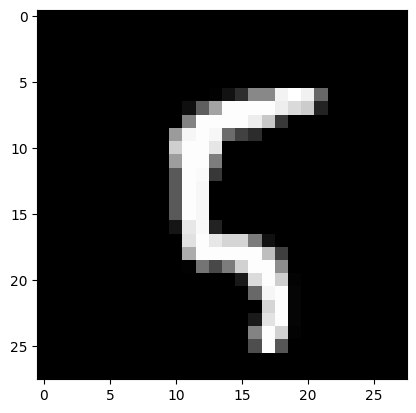

In [ ]:
plt.imshow(x_train[example], cmap="gray")

 ## Why such a low accuracy? Let's have a look at the input.


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Feeding in normalized data

In [ ]:
import keras
# from tensorflow.python.keras.datasets import mnist
# from tensorflow.python.keras import Sequential
from keras.datasets import mnist
from keras.models import Sequential



#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                                # <<<<< notice this
x_test /= 255                                 # <<<<< notice this
print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

(60000, 784)


ImportError: ignored

## Run this multiple times

In [ ]:
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
#from keras.datasets import mnist
#from keras.models import Sequential

#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

## Initializers

In [ ]:
import keras
# from tensorflow.python.keras.datasets import mnist
# from tensorflow.python.keras import Sequential
from keras.datasets import mnist
from keras.models import Sequential

#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# from keras.utils import np_utils
# y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, kernel_initializer='lecun_uniform', activation='relu', input_dim=784))
model.add(Dense(512, kernel_initializer='lecun_uniform', activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

(60000, 784)
Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0989
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0980
Test loss: nan
Test accuracy: 0.09799999743700027


## Batch normalization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.datasets import mnist
#from tensorflow.python.keras import Sequential
#import keras
from keras.datasets import mnist
from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = tf.keras.Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(keras.layers.BatchNormalization())                   ### <<<<< notice this
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

(60000, 784)
Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.4635 - accuracy: 0.8666
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2192 - accuracy: 0.9375
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9521
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1425 - accuracy: 0.9598
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9618
Test loss: 0.12525464594364166
Test accuracy: 0.9617999792098999


### Combining things

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from keras.utils import np_utils
from tensorflow.keras import layers
#from tensorflow.python.keras.datasets import mnist
#from tensorflow.python.keras import Sequential
#import keras
from keras.datasets import mnist
from keras.models import Sequential


#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# from keras.utils import np_utils
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = tf.keras.Sequential()
model.add(Dense(512, kernel_initializer='he_normal', activation='relu', input_dim=784))
model.add(keras.layers.BatchNormalization())                   ### <<<<< notice this
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

(60000, 784)
Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.4626 - accuracy: 0.8635
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2076 - accuracy: 0.9398
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1563 - accuracy: 0.9539
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1285 - accuracy: 0.9623
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.9619
Test loss: 0.12269898504018784
Test accuracy: 0.961899995803833


##The 2nd dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential([
    Dense(512, activation='relu', input_dim=3072),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])


Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9869 - accuracy: 0.2930
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 1.8158 - accuracy: 0.3635
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 1.7434 - accuracy: 0.3910
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 1.6932 - accuracy: 0.4073
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 1.6839 - accuracy: 0.4093
Test loss: 1.6839364767074585
Test accuracy: 0.4092999994754791


## Let's Play with a CNN now

In [ ]:
import keras
from tensorflow.keras.models import Sequential
# from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD




# from keras import optimizers
import numpy as np

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003
    return lrate

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#training
batch_size = 64
opt_rms = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# opt_rms = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=2,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])


#save to disk
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

<ipython-input-32-fc9d3451b261>:90: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\


781/781 [==============================] - 40s 41ms/step - loss: 2.0150 - accuracy: 0.3770 - val_loss: 1.4627 - val_accuracy: 0.5012 - lr: 0.0010
Epoch 2/2
781/781 [==============================] - 35s 45ms/step - loss: 1.5121 - accuracy: 0.4912 - val_loss: 1.5448 - val_accuracy: 0.4988 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 1s 9ms/step - loss: 1.5448 - accuracy: 0.4988

Test result: 49.880 loss: 1.545


In [ ]:

# from keras import optimizers
from tensorflow.keras import optimizers


model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate=0.01,  momentum=0.9, nesterov=True)
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
# from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np



(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()


opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)
# opt_rms = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=32, verbose=1,validation_data=(x_test,y_test))

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 16, 16, 64)        0         
                                                      